In [1]:
%matplotlib inline
import numpy
from ecell4 import *

In [5]:
D = 1.  # 0.01
radius = 0.005
rng = GSLRandomNumberGenerator()
Na = 18
#rng.seed(0)
#y0 =
duration = 200.
T = numpy.linspace(0, duration, 100)
V = 1.
Vr = V*(1e-18)
NA = 6.02e23
ka = 3e9 / (NA*Vr*1000)
print ka
kd = 21.5
kp = 89.55
kdec =0.04
kD = 4*3.14*2*radius*D
kon = ka*kD/(ka+kD)
koff = kon*kd/ka
print kon,koff
dt = 2*radius*radius/3./D
pacc = ka/6./(2**0.5)/D/radius
print 'pacc',pacc,dt/pacc


4.98338870432
0.122512234316 0.528558616252
pacc 117.459598204 1.41892760758e-07


In [11]:
with species_attributes():
    A | {'D': str(D)}
    B | {'D': '0.0'}
    C | {'D': str(D)}
    P | {'D': str(D)}
    AB | {'D': '0.0'}

with reaction_rules():
    A + B == C | (kon/Vr,koff)
    C > P+AB | kp
    AB > A + B | 100000.
    P > ~P | kdec

m = get_model()

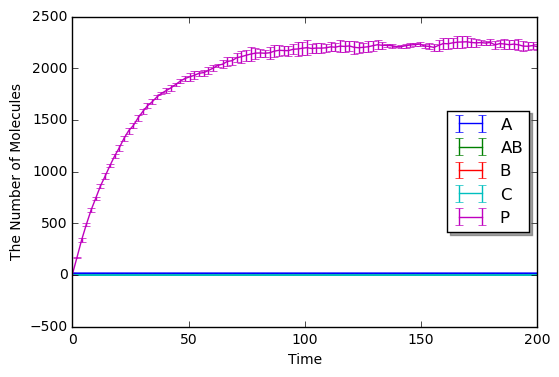

In [12]:
simrun = 5
ensemble_simulations(simrun,T, model=m,y0= {'A': Na,'B':1}, solver='gillespie',volume=V)
